# import required libraries

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold, cross_val_score
from sklearn.svm import SVC

In [54]:
from sklearn.metrics import classification_report, confusion_matrix , precision_score,  recall_score, auc,roc_curve,accuracy_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score

In [55]:
rawdf = pd.read_csv("IRIS.csv")

In [56]:
rawdf.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [58]:
rawdf.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [59]:
rawdf['species'].describe()

count             150
unique              3
top       Iris-setosa
freq               50
Name: species, dtype: object

In [60]:
rawdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


# DATA VISUALIZE

<AxesSubplot: xlabel='species', ylabel='count'>

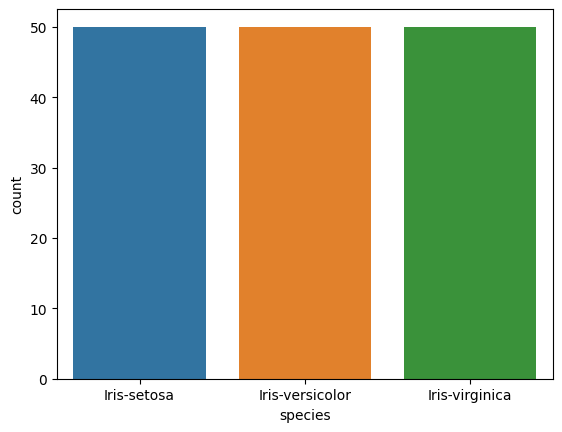

In [61]:
sns.countplot(x=rawdf["species"])

In [62]:
rawdf.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa


<AxesSubplot: xlabel='sepal_length', ylabel='count'>

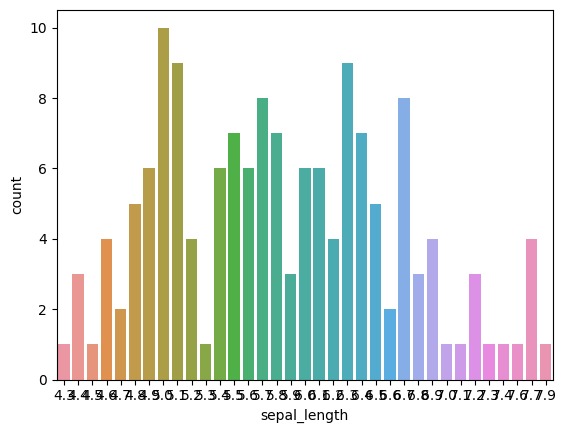

In [63]:
sns.countplot(x=rawdf["sepal_length"])

In [64]:
d={"Iris-setosa":0 , "Iris-versicolor":1 , "Iris-virginica":2}

In [65]:
rawdf['species'] = rawdf["species"].map(d)

In [66]:
rawdf

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# TRAIN AND TEST THE MODEL

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X = rawdf.drop('species',axis=1)

In [69]:
y = rawdf["species"]

In [70]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [71]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [73]:
X_train.shape,y_train.shape

((105, 4), (105,))

In [74]:
X_test.shape,y_test.shape

((45, 4), (45,))

In [75]:
def Evaluate_Performance(Model, Xtrain, Xtest, Ytrain, Ytest) : 
    Model.fit(Xtrain,Ytrain)
    overall_score = cross_val_score(Model, Xtrain,Ytrain, cv=10)
    model_score = np.average(overall_score)
    Ypredicted = Model.predict(Xtest)
    avg = 'weighted'
    print("\n • Training Accuracy Score : ", round(Model.score(Xtrain, Ytrain) * 100,2))
    print(f" • Cross Validation Score : {round(model_score * 100,2)}")
    print(f" • Testing Accuracy Score :{round(accuracy_score(Ytest, Ypredicted) * 100,2)}")
    print(f" • Precision Score is : {np.round(precision_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f" • Recall Score is : {np.round(recall_score(Ytest, Ypredicted , average=avg) * 100,2)}")
    print(f" • F1-Score Score is : {np.round(f1_score(Ytest, Ypredicted , average=avg) * 100,2)}")

In [76]:
SVM = SVC()
SVM.fit(X_train , y_train)
y_pred_SVM = SVM.predict(X_test)
print("SVM : ")
Evaluate_Performance(SVM, X_train, X_test, y_train, y_test)

SVM : 

 • Training Accuracy Score :  98.1
 • Cross Validation Score : 97.09
 • Testing Accuracy Score :97.78
 • Precision Score is : 97.93
 • Recall Score is : 97.78
 • F1-Score Score is : 97.77
